This notebook will be a rough primer on ML using Python.

My thought process in this notebook was guided by Intro to ML with Python by Data District Labs!

This notebook will just give a taste of ML techniques!

ML can be categorised into 3 broad categories:

 - Supervised - there is a 'correct' label/parameter
 - Unsupervised - No such 'correct' label/parameter
 - Reinforcement learning - model interacts with it's envoronment.
     Very advanced technique that I will not cover in this notebook.
 
 Supervised learning:
     - regression - labels are continuous i.e. %'s, probabilities
     - classification - labels are categorical/discrete i.e. "Yes", "No", "Red", "Blue"

Unsupervised Learning:
- Discovering hidden structure in unlabeled data. 
- Attempts to organize datasets into groups of similar data points, ensuring the groups are meaningfully dissimilar from each other. 
- successful at detecting patterns within datasets

 Clustering:
     - partitive/centroidal
         - represented by central vectors, distributions, or densities. common techniques: k-means, k-medoids, OPTICS, and affinity propagation.
     - hierarchical
         - predetermined ordering from top to bottom
         - agglomerative (clusters begin as single instances and iteratively aggregate by similarity until all belong to a single group)
         - divisive (the dataset is gradually partitioned, beginning with all instances and finishing with single instances).
    

Lets try out some examples!

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os

In [2]:
diabetes = load_diabetes()
boston = load_boston()

In [3]:
boston.keys() #NOTE that the DESCR ley corresponds to a description of the dataset. Not needed for analysis.

dict_keys(['feature_names', 'DESCR', 'target', 'data'])

In [4]:
boston['data'][1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [5]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [6]:
boston["target"][:10]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

In [7]:
diabetes.keys()

dict_keys(['target', 'data'])

In [8]:
diabetes['data'][1]

array([-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
       -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405])

In [9]:
diabetes["target"][:10]

array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,  310.])

From the above, we can see that both of our datasets have labels (target) that are continuous in nature. As such, this calls for supervised learning of the regression type!

Let's run a few different types of regression models on the data and see which of them perform the best.

We will use the following as evaluation metrics:

 - mean squared error: precision (variance) and accuracy (bias)

 - R2 score: how well the prediction fits the data (explained variance)



Note that the below models are really just testing the effectiveness of different regression models. That is, we already have the 'target' scores and we want to see which models get's us the best predictionof targets when analysing all the data.

In [10]:
model = LinearRegression()
model.fit(diabetes.data, diabetes.target) 

expected = diabetes.target
predicted = model.predict(diabetes.data)


In [11]:
print("Linear regression model: Diabetes dataset")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Linear regression model: Diabetes dataset
Mean squared error = 2859.690
R2 score = 0.518


In [12]:
model.fit(boston.data, boston.target)

expected = boston.target
predicted = model.predict(boston.data)

print("Linear regression model: Boston dataset")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Linear regression model: Boston dataset
Mean squared error = 21.898
R2 score = 0.741


Here we can see that the Linear Regression model explained 51.8% of variance in the Diabetes dataset and 74% of variation in the Boston dataset. It seems taht Linear Regression is pretty decent for the Boston data set - however, let us continue! Onwards to Ridge Regression!

Ridge Regression is a form of Regularization! That is, it helps prevent overfitting by reducing the regression coefficent sizes. Overall, this leads to a smaller variance when compared to standard Linear Regression.

In [13]:
model = Ridge(alpha=0.1)
model.fit(diabetes.data, diabetes.target)

expected = diabetes.target
predicted = model.predict(diabetes.data)

print("Ridge regression model: Diabetes dataset")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Ridge regression model: Diabetes dataset
Mean squared error = 2890.445
R2 score = 0.513


In [14]:
model.fit(boston.data, boston.target)

expected = boston.target
predicted = model.predict(boston.data)

print("Ridge regression model: Boston dataset")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Ridge regression model: Boston dataset
Mean squared error = 21.901
R2 score = 0.741


Seems that ridge regression gives us very similar values to our standard linear regression! Looks like our original regression didnt really overfit. Sweet!

Let's turn our attention to an ensemble method now:
   - This technique: takes multiple algo's and puts them together or runs an algo multiple times and combines it's results.
   
We will illustrate this with a Random Forest Regression (RFR)!

Glossary:
 - DTR: Decision Tree Regression


In [15]:
model = RandomForestRegressor()
model.fit(diabetes.data, diabetes.target)

expected = diabetes.target
predicted = model.predict(diabetes.data)

print("Random Forest model: Diabetes dataset")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Random Forest model: Diabetes dataset
Mean squared error = 655.428
R2 score = 0.889


In [16]:
model.fit(boston.data, boston.target)

expected = boston.target
predicted = model.predict(boston.data)

print("Random Forest model: Boston dataset")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Random Forest model: Boston dataset
Mean squared error = 1.965
R2 score = 0.977


Woah!! Our ensemble methods have blown our other two regression techniques into oblivion! This should not be surprising as a RFR uses a series of DTR and takes each DTR average.

Let us now move onto some classifcation supervised learning! We will use the famous Haberman Dataset on Breast Cancer that was collected at the University of Chicago

In [17]:
URL = "http://mlr.cs.umass.edu/ml/machine-learning-databases/haberman/haberman.data"
response = requests.get(URL)
outpath = os.path.abspath("haberman.txt")
with open(outpath, 'wb') as f:
    f.write(response.content)

df = pd.read_csv("haberman.txt", header=None, names=["age_at_op","op_yr","nr_nodes","survival"])
FEATURES = df[["age_at_op","op_yr","nr_nodes"]]
TARGETS = df[["survival"]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(FEATURES, TARGETS, test_size = 0.2)
#20% of the data will be used to test, thus 80% is used for training!

What if certain chunks of the data have more variance than others?

We need to use cross validation (~ 12 folds is good) to ensure that your models perform just as well regardless of the particular way the data are divided up.

For this, we will be using something called a classification report!

<img src="Precision.png">

Let's use our first classifier - Logisitic regression!

In [19]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

#we need to turn these into matrices!

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
y_train = y_train.as_matrix().ravel() #flattens out the matrix. Required for our dependent variable.
y_test = y_test.as_matrix().ravel()

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Logistic Regression Classifier: Haberman survival dataset")
print(classification_report(expected, predicted, target_names=[">=5 years","<5 years"]))

Logistic Regression Classifier: Haberman survival dataset
             precision    recall  f1-score   support

  >=5 years       0.78      0.96      0.86        47
   <5 years       0.50      0.13      0.21        15

avg / total       0.71      0.76      0.70        62



Now let's do some SVM's!

Here, points are placed in a transformed problem space that separate the classes into groups.

When data isn't linearly separable, mapping to a higher dimensional feature space by computing the kernels can greatly simplify the issue - this is know as the "kernel trick"). SVM's are versatile because they can be parameterized with a variety of different kernel functions including linear, polynomial, sigmoid, and radial basis.

In [22]:
model = SVC() # The default parameters for SVC are a radial basis function kernel of degree 3
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Support Vector Machine Classifier: Haberman survival dataset")
print(classification_report(expected, predicted, target_names=[">=5 years","<5 years"]))

Support Vector Machine Classifier: Haberman survival dataset
             precision    recall  f1-score   support

  >=5 years       0.75      0.98      0.85        47
   <5 years       0.00      0.00      0.00        15

avg / total       0.57      0.74      0.65        62



Let's use the random forest approach again, however, this time we wil use the classifier version! It is important to note that the Sci-Kit learn packages contain both the calssified and regressor version of supervised learning algo's!

In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Random Forest Classifier: Haberman survival dataset")
print(classification_report(expected, predicted, target_names=[">=5 years","<5 years"]))

Random Forest Classifier: Haberman survival dataset
             precision    recall  f1-score   support

  >=5 years       0.76      0.83      0.80        47
   <5 years       0.27      0.20      0.23        15

avg / total       0.65      0.68      0.66        62



Now let's move onto some unsupervised learning! Specifically, clustering!! We will use some grocery data from UCI ML Repo of Datasets!

Clustering algorithms attempt to find patterns in unlabeled data. They are usually grouped into two main categories: centroidal (to find the centers of clusters) and hierarchical (to find clusters of clusters).

Let's start with K-Means clustering

In [24]:
df = pd.read_csv("wholesale-customers.csv")

In [25]:
df.head(1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338


In [26]:
data = df.values
model = KMeans(n_clusters=7)
model.fit(data)

labels = model.labels_
centroids = model.cluster_centers_

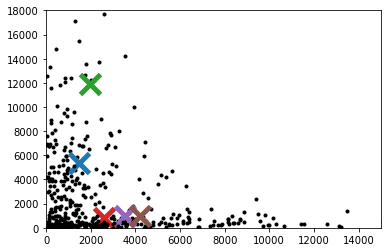

In [27]:
for i in range(7):
    # Plot the points. Hint: Try using principal component analysis (PCA) to narrow down features.
    datapoints = data[np.where(labels==i)]
    plt.plot(datapoints[:,3],datapoints[:,4],'k.')
    # Plot the centroids.
    centers = plt.plot(centroids[i,3],centroids[i,4],'x')
    plt.setp(centers,markersize=20.0)
    plt.setp(centers,markeredgewidth=5.0)
plt.xlim([0,15000])
plt.ylim([0,18000])
plt.show()

The black dots are our data points and the x's represent the centers of the clusters that were identified by our model

<img src="Operational ML.png">

<img src="ML flow.png">